In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db = mysql.connector.connect(host = 'localhost',
                             username = 'root',
                             password = '*****',
                             database = 'ecommerce')
cur = db.cursor()

#List all unique cities where customers are located

In [28]:
query = """select distinct customer_city from customers"""

cur.execute(query)

data = cur.fetchall()

data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

#Count the number of orders placed in 2017

In [38]:
query = """select count(order_id) from orders where year(order_purchase_timestamp) = 2017"""

cur.execute(query)

data = cur.fetchall()

data[0][0]

90202

In [42]:
query = """select count(order_id) from orders where year(order_purchase_timestamp) = 2017"""

cur.execute(query)

data = cur.fetchall()

"total orders placed in 2017 are", data[0][0]

('total orders placed in 2017 are', 90202)

#find the total sales per category

In [54]:
query = """select pr.product_category, round(sum(p.payment_value),2)
from products pr
join order_items oi
on
pr.product_id = oi.product_id
join payments p
on 
p.order_id = oi.order_id
group by pr.product_category """

cur.execute(query)

data = cur.fetchall()

data

[('perfumery', 506738.66),
 ('Furniture Decoration', 1430176.39),
 ('telephony', 486882.05),
 ('bed table bath', 1712553.67),
 ('automotive', 852294.33),
 ('computer accessories', 1585330.45),
 ('housewares', 1094758.13),
 ('babies', 539845.66),
 ('toys', 619037.69),
 ('Furniture office', 646826.49),
 ('Cool Stuff', 779698.0),
 ('HEALTH BEAUTY', 1657373.12),
 ('pet Shop', 311268.97),
 ('General Interest Books', 64694.76),
 ('stationary store', 317440.07),
 ('Watches present', 1429216.68),
 ('PCs', 279121.55),
 ('climatization', 91170.66),
 ('Construction Tools Construction', 241475.63),
 ('sport leisure', 1392127.56),
 ('Bags Accessories', 187151.29),
 ('electronics', 259857.1),
 ('Casa Construcao', 136645.29),
 ('Games consoles', 195480.38),
 ('Fashion Bags and Accessories', 218158.28),
 ('home appliances', 95532.27),
 ('Garden tools', 838280.75),
 ('Agro Industria e Comercio', 118730.61),
 (None, 252801.71),
 ('audio', 60324.62),
 ('technical books', 24915.44),
 ('Construction Tools 

In [66]:
query = """select pr.product_category, round(sum(p.payment_value),2)
from products pr
join order_items oi
on
pr.product_id = oi.product_id
join payments p
on 
p.order_id = oi.order_id
group by pr.product_category """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["category", "sales"])
df

,category,sales
0,perfumery,506738.66
1,Furniture Decoration,1430176.39
2,telephony,486882.05
3,bed table bath,1712553.67
4,automotive,852294.33
...,...,...
69,cds music dvds,1199.43
70,La Cuisine,2913.53
71,Fashion Children's Clothing,785.67
72,PC Gamer,2174.43


#Calculate the percentage of orders that were paid in installments.

In [74]:
query = """select sum(case when payment_installments >= 1 then 1 
else 0 end) from payments """

cur.execute(query)

data = cur.fetchall()

data

[(Decimal('103884'),)]

In [78]:
query = """select sum(case when payment_installments >= 1 then 1 
else 0 end)/count(*) from payments """

cur.execute(query)

data = cur.fetchall()

data

[(Decimal('1.0000'),)]

In [82]:
query = """select (sum(case when payment_installments >= 1 then 1 
else 0 end)/count(*))*100 from payments """

cur.execute(query)

data = cur.fetchall()

data

[(Decimal('99.9981'),)]

#Count the number of customers from each state.

In [8]:
query = """ select customer_state, count(customer_id)
from customers
group by customer_state
"""

cur.execute(query)

data = cur.fetchall()

data

[('SP', 83492),
 ('SC', 7274),
 ('MG', 23270),
 ('PR', 10090),
 ('RJ', 25704),
 ('RS', 10932),
 ('PA', 1950),
 ('GO', 4040),
 ('ES', 4066),
 ('BA', 6760),
 ('MA', 1494),
 ('MS', 1430),
 ('CE', 2672),
 ('DF', 4280),
 ('RN', 970),
 ('PE', 3304),
 ('MT', 1814),
 ('AM', 296),
 ('AP', 136),
 ('AL', 826),
 ('RO', 506),
 ('PB', 1072),
 ('TO', 560),
 ('PI', 990),
 ('AC', 162),
 ('SE', 700),
 ('RR', 92)]

In [14]:
query = """ select customer_state, count(customer_id)
from customers
group by customer_state
"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data)
df

,0,1
0,SP,83492
1,SC,7274
2,MG,23270
3,PR,10090
4,RJ,25704
5,RS,10932
6,PA,1950
7,GO,4040
8,ES,4066
9,BA,6760


<BarContainer object of 27 artists>

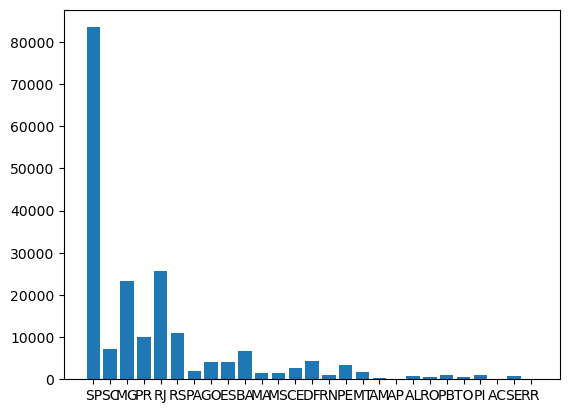

In [20]:
query = """ select customer_state, count(customer_id)
from customers
group by customer_state
"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["state", "customer_count"])

plt.bar(df["state"], df["customer_count"])

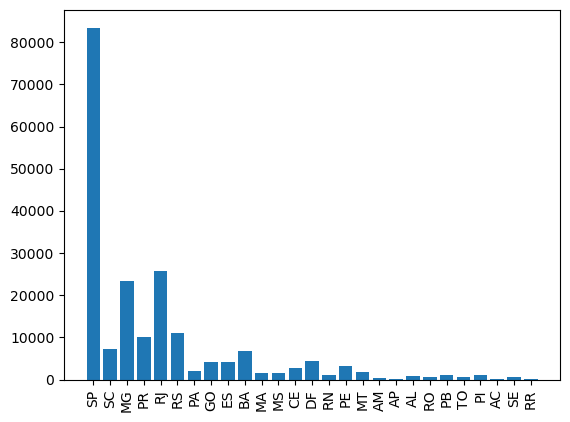

In [24]:
query = """ select customer_state, count(customer_id)
from customers
group by customer_state
"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["state", "customer_count"])

plt.bar(df["state"], df["customer_count"])
plt.xticks(rotation = 90)
plt.show()

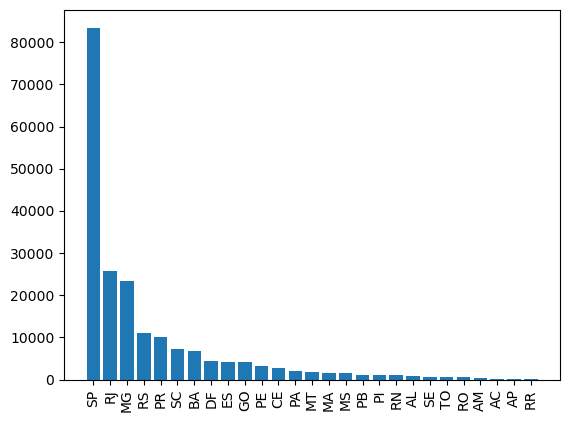

In [28]:
query = """ select customer_state, count(customer_id)
from customers
group by customer_state
"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["state", "customer_count"])
df = df.sort_values(by = "customer_count", ascending = False)

plt.bar(df["state"], df["customer_count"])
plt.xticks(rotation = 90)
plt.show()

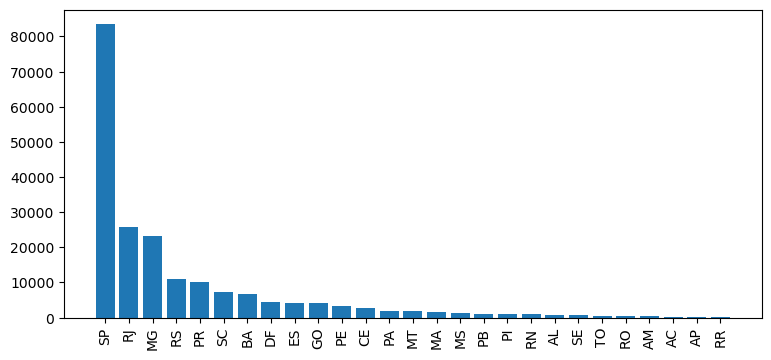

In [34]:
query = """ select customer_state, count(customer_id)
from customers
group by customer_state
"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["state", "customer_count"])
df = df.sort_values(by = "customer_count", ascending = False)

plt.figure(figsize = (9,4))
plt.bar(df["state"], df["customer_count"])
plt.xticks(rotation = 90)
plt.show()

#Calculate the number of orders per month in 2018

In [44]:
query = """ select monthname(order_purchase_timestamp) months, count(order_id) order_count
from orders
where year(order_purchase_timestamp) = 2018
group by months
"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data)
df

,0,1
0,July,12584
1,August,13024
2,February,13456
3,June,12334
4,March,14422
5,January,14538
6,May,13746
7,April,13878
8,September,32
9,October,8


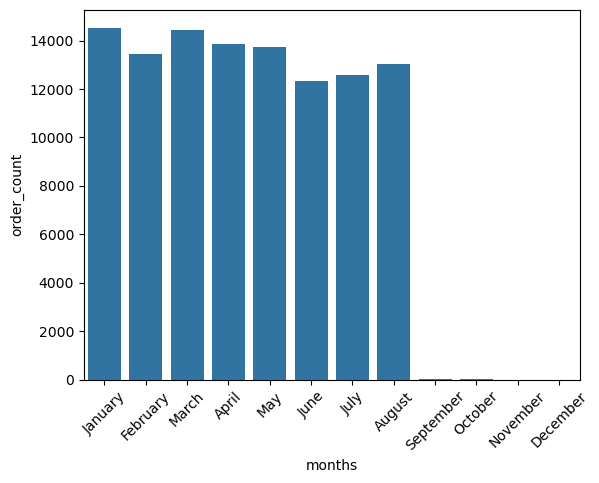

In [62]:
query = """ select monthname(order_purchase_timestamp) months, count(order_id) order_count
from orders
where year(order_purchase_timestamp) = 2018
group by months
"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["months", "order_count"])
o = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

sns.barplot(x = df["months"], y = df["order_count"], data = df, order = o)
plt.xticks(rotation = 45)
plt.show()

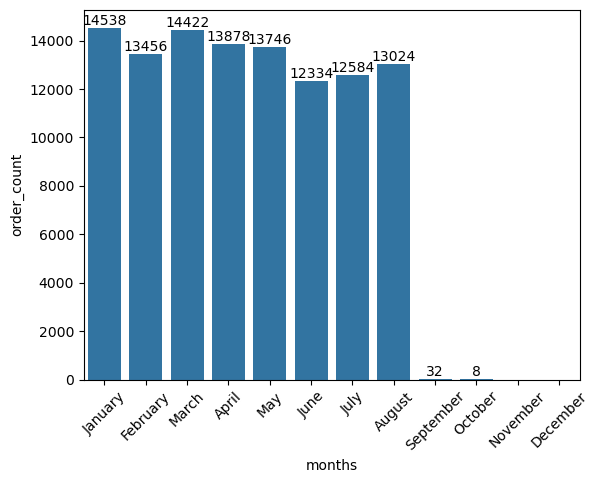

In [70]:
query = """ 
select monthname(order_purchase_timestamp) months, count(order_id) order_count
from orders
where year(order_purchase_timestamp) = 2018
group by months
"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns=["months", "order_count"])
o = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

# Capture the Axes object returned by sns.barplot
ax = sns.barplot(x=df["months"], y=df["order_count"], data=df, order=o)
plt.xticks(rotation=45)

# Use the defined ax variable to add bar labels
ax.bar_label(ax.containers[0])

plt.show()

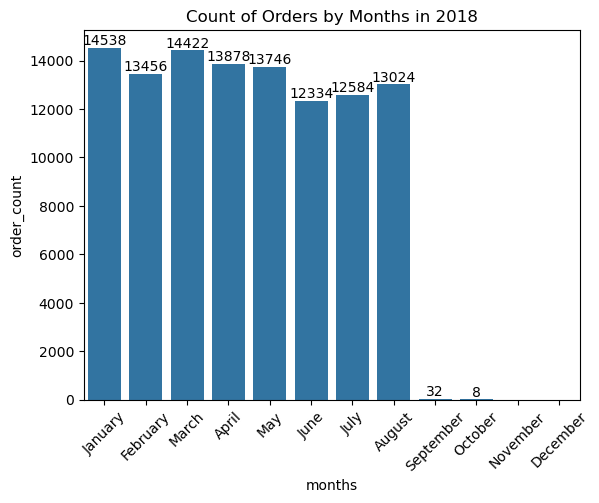

In [4]:
query = """ 
select monthname(order_purchase_timestamp) months, count(order_id) order_count
from orders
where year(order_purchase_timestamp) = 2018
group by months
"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns=["months", "order_count"])
o = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

# Capture the Axes object returned by sns.barplot
ax = sns.barplot(x=df["months"], y=df["order_count"], data=df, order=o)
plt.xticks(rotation=45)

# Use the defined ax variable to add bar labels
ax.bar_label(ax.containers[0])
plt.title("Count of Orders by Months in 2018")

plt.show()